**IMPORT NECCESSARY LIBRARIES**
***

In [2]:
import numpy as np
import pandas as pd
from matplotlib.pylab import plt
import seaborn as sns
import pickle
from joblib import dump

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix , classification_report

In [3]:
pip show scikit-learn

Name: scikit-learn
Version: 1.3.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\rammu\anaconda3\lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: scikit-learn-intelex
Note: you may need to restart the kernel to use updated packages.


**1 - Read the dataset**
***

In [59]:
pip install --upgrade pip setuptools


  Using cached pip-23.3.1-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 21.2.4
    Uninstalling pip-21.2.4:
      Successfully uninstalled pip-21.2.4
Note: you may need to restart the kernel to use updated packages.


In [60]:
pip install --upgrade scikit-learn==1.3.2

  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 9.3/9.3 MB 9.8 MB/s eta 0:00:00
Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
Note: you may need to restart the kernel to use updated packages.


In [4]:
df = pd.read_csv("WELFake_Dataset.csv")
df.head(10)

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
6,6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1
7,7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1
8,8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1
9,9,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1


In [6]:
#df['title'].replace('', np.nan, inplace=True)
#df['text'].replace('', np.nan, inplace=True)
#df.dropna(inplace=True)
#df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1


In [5]:
df.iloc[:-1000, [0,1,3]].to_csv("test_data.csv", index=False)
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [25]:
df.iloc[-1000:,[0,1,2]].to_csv("test_data.csv",index=False)

**Visualize real and fake entries in the dataset**

Text(0.5, 1.0, 'Distribution of Fake/Real News')

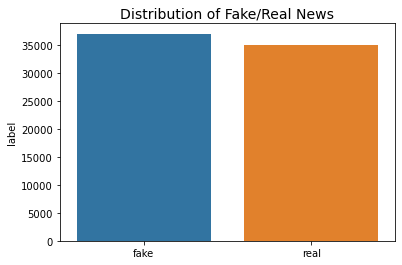

In [6]:
class_names = ['fake', 'real']
label_count = df.label.value_counts()
sns.barplot(x=class_names, y=label_count)
plt.title('Distribution of Fake/Real News',fontsize =14)

**2 - DATA PREPROCESSING**
***

**2.1 - Remove null values**

In [67]:
df.isnull().sum()

title    558
text      39
label      0
dtype: int64

In [7]:
df = df.fillna('')
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [8]:
df["title_text"] = df["title"] + df["text"]
#df["body_len"] = df["title_text"].apply(lambda x: len(x) - x.count(" "))
df.head()

,title,text,label,title_text
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
1,,Did they post their votes for Hillary already?,1,Did they post their votes for Hillary already?
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri..."
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...


**2.2 - Lowercasing**


In [9]:
df['title_text'] = df['title_text'].str.lower()

**2.3 - Tokenization**

In [10]:
df['title_text'] = df['title_text'].apply(nltk.word_tokenize)

**2.4 - Stopword Removal**

In [11]:
stop_words = set(nltk.corpus.stopwords.words("english"))
df['title_text'] = df['title_text'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

**2.5 - Punctuation and Special Character Removal**

In [12]:
df['title_text'] = df['title_text'].apply(lambda tokens: [re.sub(r'[^\w\s]', '', token) for token in tokens])

**2.6 - Stemming and Lemmatization**

In [13]:
stemmer = nltk.PorterStemmer()
lemmatizer = nltk.WordNetLemmatizer()
df['title_text'] = df['title_text'].apply(lambda tokens: [stemmer.stem(lemmatizer.lemmatize(token)) for token in tokens])

# Join the preprocessed tokens back into a text
df['title_text'] = df['title_text'].apply(lambda tokens: " ".join(tokens))

**3 - FEATURE EXTRACTION**
***

**3.1 - TF-IDF Vectorization**

In [14]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['title_text'])

**3.2 - Serialize the Vectorizer object**

In [21]:
pickle.dump(tfidf_vectorizer, open("vectorizer.pkl", "wb"))

**4 - SPLIT DATA INTO TRAIN AND TEST**
***

In [28]:
X = tfidf_matrix  
y = df['label'] 

# Split the data into training and test sets (adjust test_size and random_state as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**5 - MODEL TRAINING METHODS**
***

**5.1 - Naive Bayes Classifier**
***

**5.1.1 - Train model**

In [29]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

**5.1.2 - Model Evaluation**

In [30]:
y_pred = nb_classifier.predict(X_test)
accuracy = classification_report(y_test, y_pred)
print(accuracy)

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      7089
           1       0.89      0.86      0.87      7338

    accuracy                           0.87     14427
   macro avg       0.88      0.88      0.87     14427
weighted avg       0.88      0.87      0.87     14427



**Accuracy achieved: 87%**

**5.1.3 - Confusion Matrix**

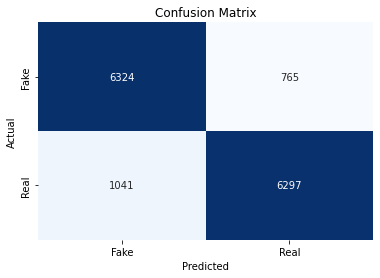

In [31]:
confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**5.2 - Random Forest Classifier**
***

**5.2.1 - Train model**

In [17]:
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

**5.2.2 - Model Evaluation**

In [18]:
y_pred = rf_classifier.predict(X_test)
accuracy = classification_report(y_test, y_pred)
print(accuracy)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      6996
           1       0.93      0.95      0.94      7431

    accuracy                           0.94     14427
   macro avg       0.94      0.93      0.94     14427
weighted avg       0.94      0.94      0.94     14427



**Accuracy achieved: 94%**

**5.2.3 - Confusion Matrix**

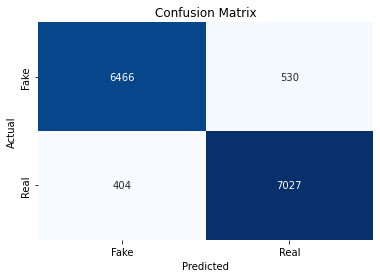

In [27]:
confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**5.3 - Weak Learner Boosting ensemble method**
***

**5.3.1 - Train model**

In [49]:
clf = GradientBoostingClassifier(n_estimators=300, learning_rate=0.08, random_state=42)
clf.fit(X_train, y_train)

KeyboardInterrupt: 

**5.3.2 - Model Evaluation**

In [ ]:
y_pred = clf.predict(X_test)
accuracy = classification_report(y_test, y_pred)
print(accuracy)

**Accuracy achieved:**

**5.3.3 - Confusion Matrix**

In [ ]:
confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Random Forest method achives maximum accuracy**

**5.4 - Serialize the best trained model**

In [37]:
pickle.dump(rf_classifier, open("model.pkl", "wb"))

In [34]:
print(nb_classifier.predict(tfidf_vectorizer.transform(["Israel-Hamas war live: Hamas reports clashes with IDF in north and south Gaza; aid plan ‘geared to fail’ without political will, says UN"])))

[0]
